In [90]:
#install packages
# install.packages("leaps")
# install.packages("MASS")
# install.packages("lars")
# install.packages("pls")

In [91]:
### Read the data
fat <- read.table(file = "G://My Drive//OMSA//ISYE 7406//Module 3//HW//fat.csv", sep=",", header=TRUE);


In [92]:
dim(fat)
head(fat)

[1] 252  18

,brozek,siri,density,age,weight,height,adipos,free,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12.6,12.3,1.0708,23,154.25,67.75,23.7,134.9,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,6.9,6.1,1.0853,22,173.25,72.25,23.4,161.3,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,24.6,25.3,1.0414,22,154.00,66.25,24.7,116.0,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,10.9,10.4,1.0751,26,184.75,72.25,24.9,164.7,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,27.8,28.7,1.0340,24,184.25,71.25,25.6,133.1,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,20.6,20.9,1.0502,24,210.25,74.75,26.5,167.0,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


In [93]:
### Split the data as in Part (a)
n = dim(fat)[1]; ### total number of observations
n1 = round(n/10); ### number of observations randomly selected for testing data
## To fix our ideas, let the following 25 rows of data as the testing subset:
flag = c(1, 21, 22, 57, 70, 88, 91, 94, 121, 127, 149, 151, 159, 162,
164, 177, 179, 194, 206, 214, 215, 221, 240, 241, 243);
fat1train = fat[-flag,];
fat1test = fat[flag,];
ytrue <- fat1test$brozek

In [94]:
# dimnesions of training dataset
dim(fat1train)

[1] 227  18

In [95]:
# dimnesions of testing dataset
dim(fat1test)

[1] 25 18

In [96]:
#summary of all variables
summary(fat1train)

     brozek           siri          density           age       
 Min.   : 0.00   Min.   : 0.00   Min.   :0.995   Min.   :22.00  
 1st Qu.:12.75   1st Qu.:12.30   1st Qu.:1.041   1st Qu.:36.50  
 Median :19.10   Median :19.30   Median :1.055   Median :43.00  
 Mean   :18.99   Mean   :19.21   Mean   :1.055   Mean   :44.98  
 3rd Qu.:24.65   3rd Qu.:25.35   3rd Qu.:1.071   3rd Qu.:54.00  
 Max.   :45.10   Max.   :47.50   Max.   :1.109   Max.   :81.00  
     weight          height          adipos           free      
 Min.   :118.5   Min.   :29.50   Min.   :18.10   Min.   :107.9  
 1st Qu.:159.8   1st Qu.:68.25   1st Qu.:23.10   1st Qu.:131.3  
 Median :176.0   Median :70.00   Median :24.90   Median :141.7  
 Mean   :179.3   Mean   :70.16   Mean   :25.45   Mean   :143.8  
 3rd Qu.:197.5   3rd Qu.:72.25   3rd Qu.:27.20   3rd Qu.:153.9  
 Max.   :363.1   Max.   :77.75   Max.   :48.90   Max.   :240.5  
      neck           chest            abdom             hip       
 Min.   :31.10   Min.  

In [97]:
#correlations of all the variables rounded to 2 decimal points
round(cor(fat1train),2);

,brozek,siri,density,age,weight,height,adipos,free,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
brozek,1.00,1.00,-0.99,0.26,0.61,-0.10,0.73,0.01,0.48,0.70,0.82,0.63,0.57,0.51,0.25,0.48,0.37,0.34
siri,1.00,1.00,-0.99,0.26,0.61,-0.10,0.73,0.00,0.48,0.70,0.82,0.63,0.56,0.51,0.25,0.48,0.37,0.34
density,-0.99,-0.99,1.00,-0.25,-0.59,0.11,-0.71,0.01,-0.46,-0.68,-0.80,-0.61,-0.56,-0.49,-0.25,-0.48,-0.36,-0.31
age,0.26,0.26,-0.25,1.00,-0.04,-0.18,0.09,-0.26,0.10,0.16,0.21,-0.07,-0.22,0.00,-0.14,-0.07,-0.08,0.21
weight,0.61,0.61,-0.59,-0.04,1.00,0.29,0.89,0.79,0.83,0.89,0.89,0.94,0.87,0.85,0.59,0.80,0.68,0.72
height,-0.10,-0.10,0.11,-0.18,0.29,1.00,-0.03,0.48,0.25,0.13,0.07,0.15,0.15,0.27,0.25,0.22,0.26,0.32
adipos,0.73,0.73,-0.71,0.09,0.89,-0.03,1.00,0.54,0.77,0.91,0.92,0.89,0.81,0.71,0.48,0.74,0.59,0.61
free,0.01,0.00,0.01,-0.26,0.79,0.48,0.54,1.00,0.67,0.58,0.48,0.69,0.67,0.69,0.56,0.65,0.60,0.66
neck,0.48,0.48,-0.46,0.10,0.83,0.25,0.77,0.67,1.00,0.78,0.75,0.73,0.70,0.67,0.46,0.73,0.67,0.73
chest,0.70,0.70,-0.68,0.16,0.89,0.13,0.91,0.58,0.78,1.00,0.92,0.83,0.73,0.71,0.46,0.73,0.62,0.64


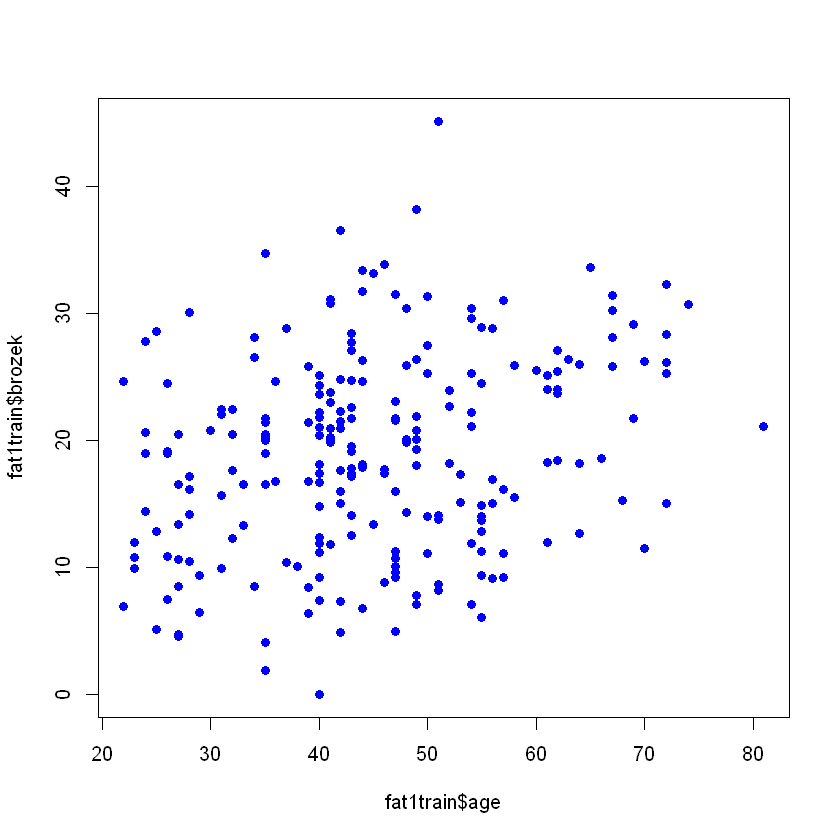

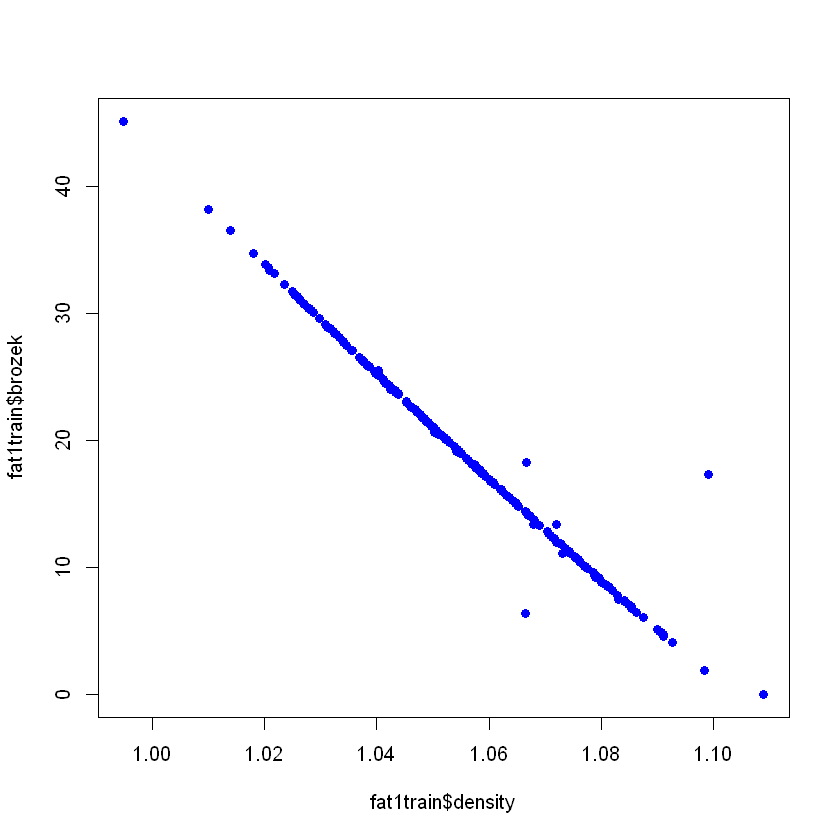

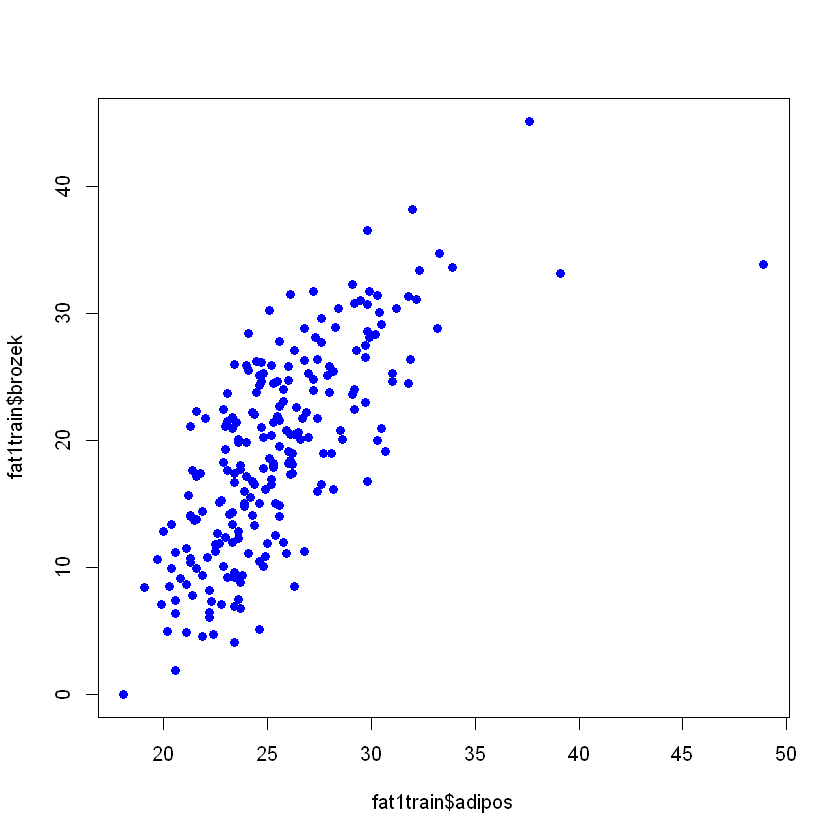

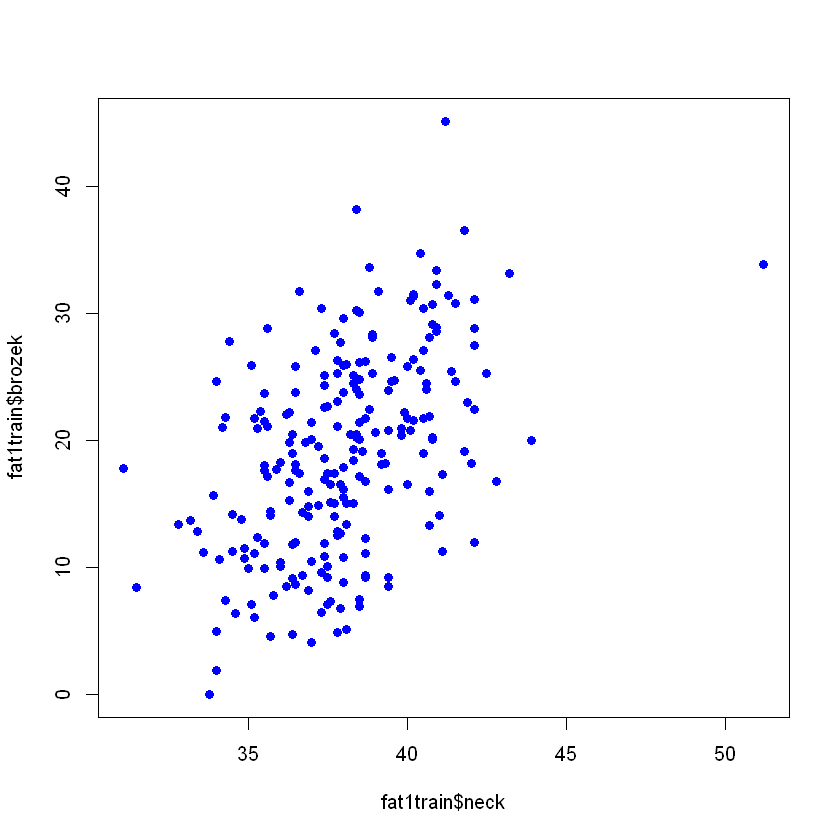

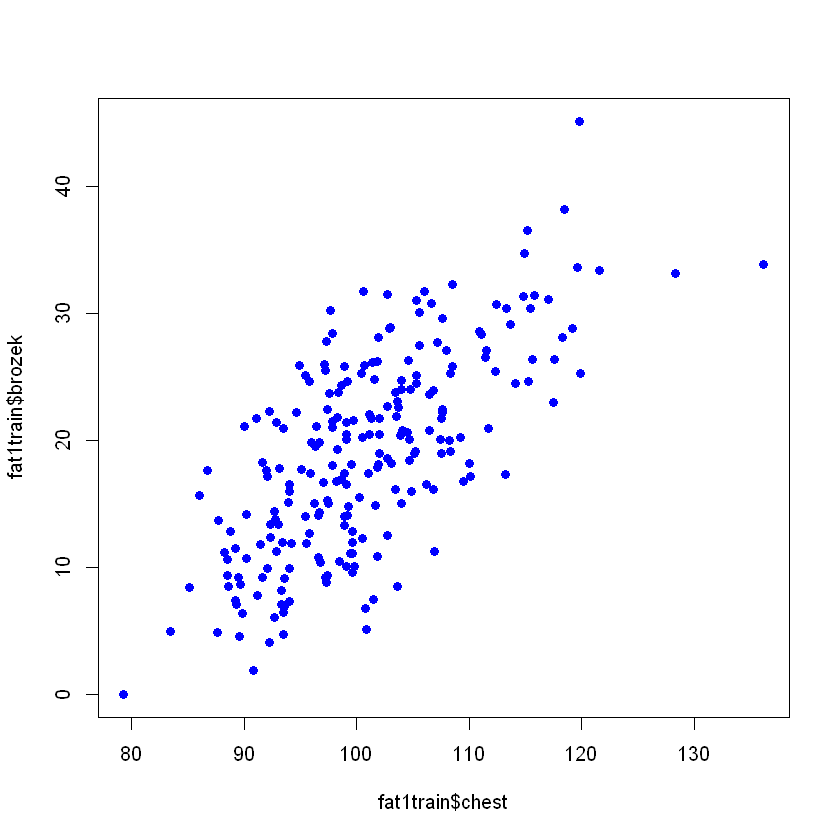

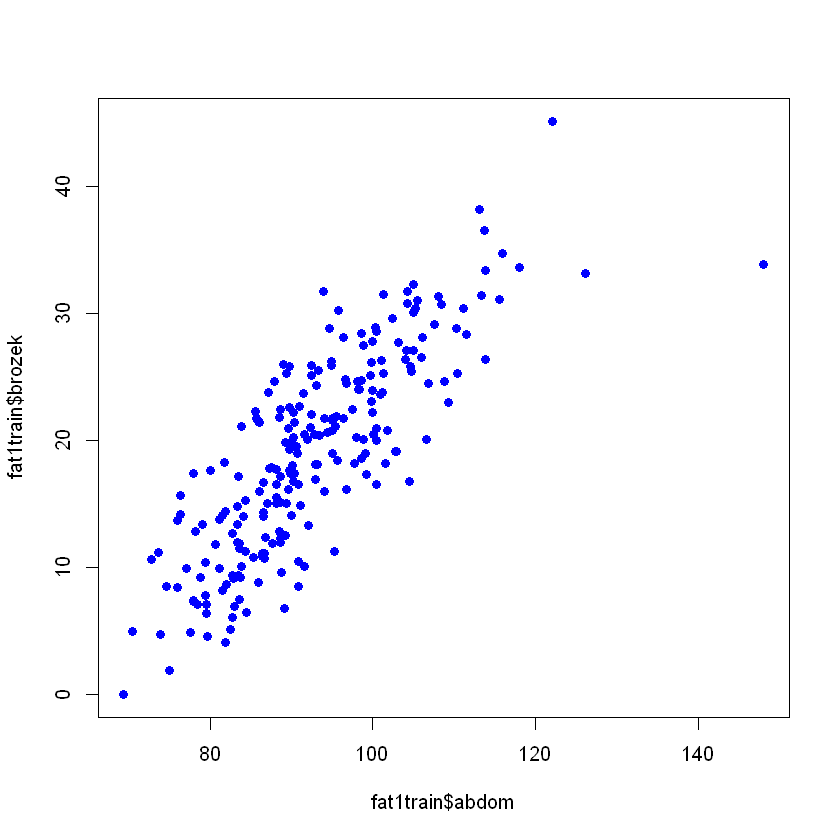

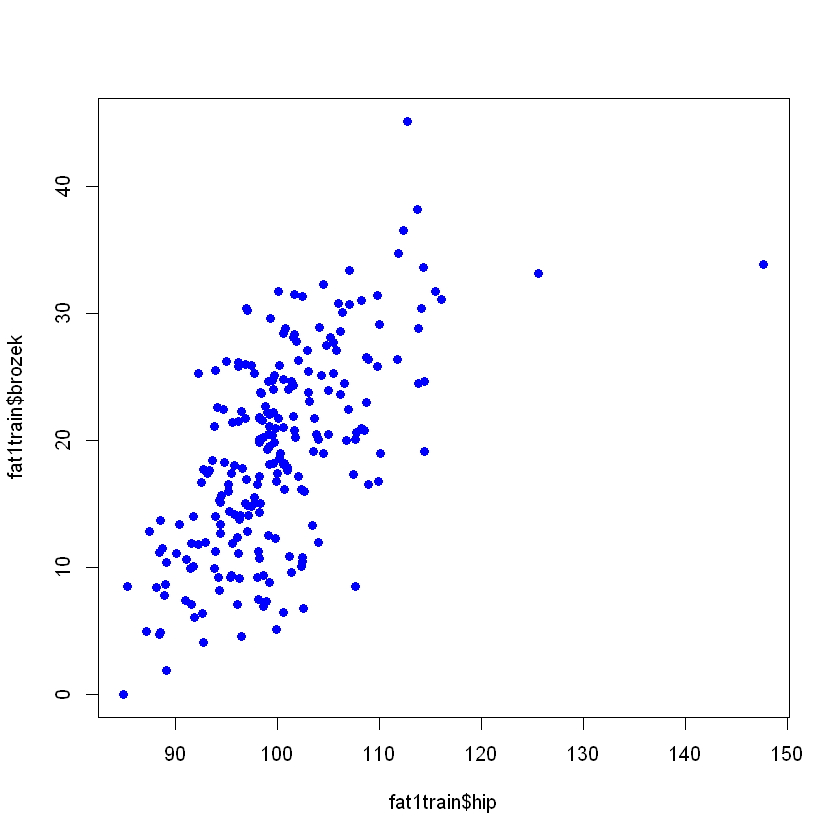

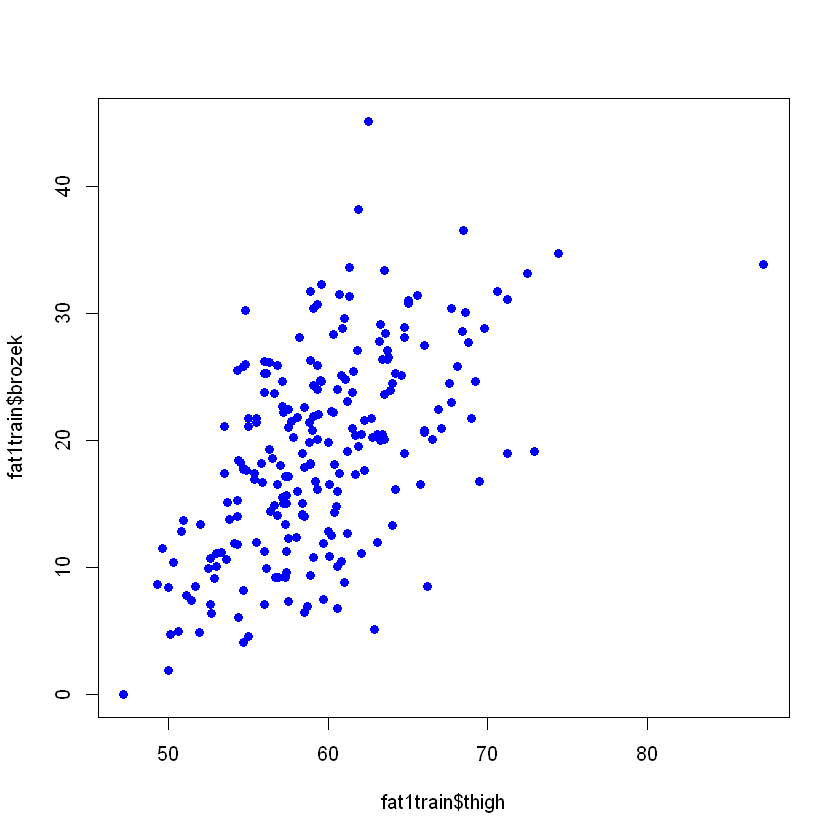

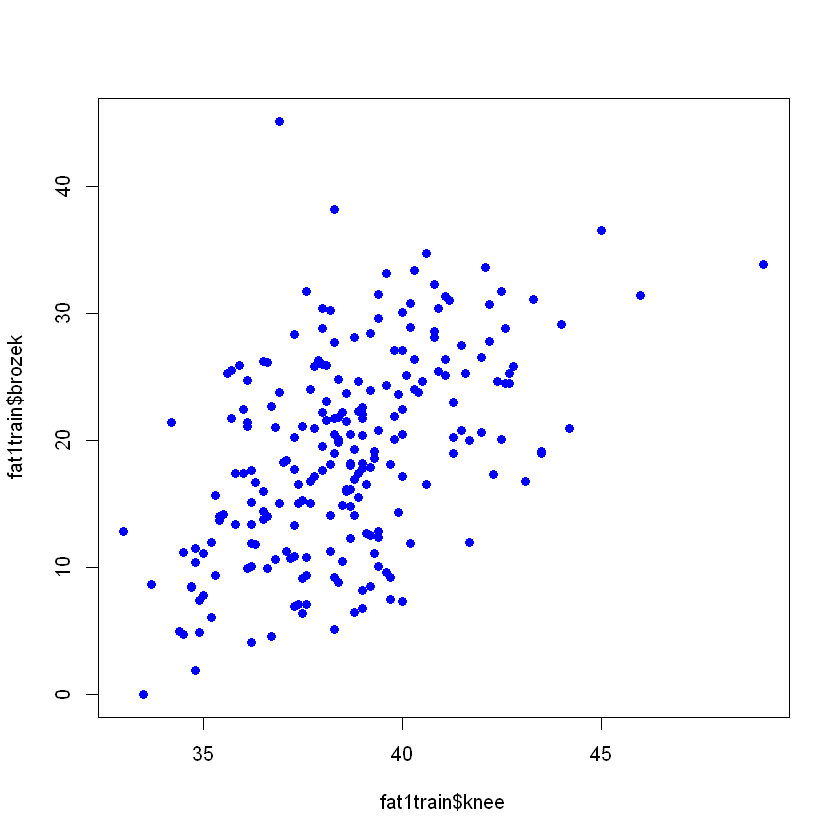

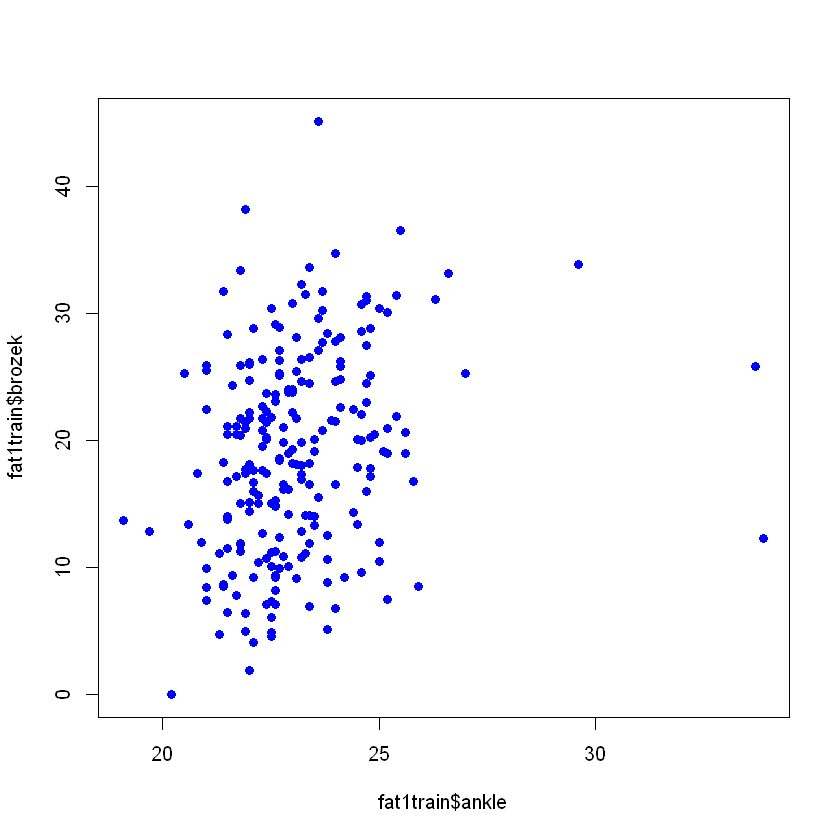

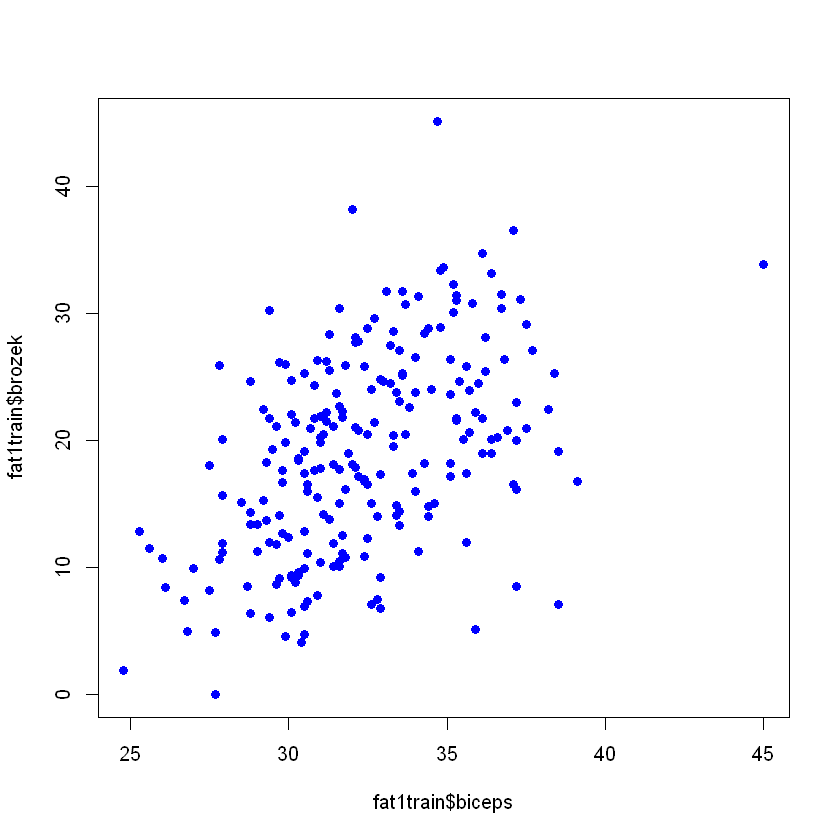

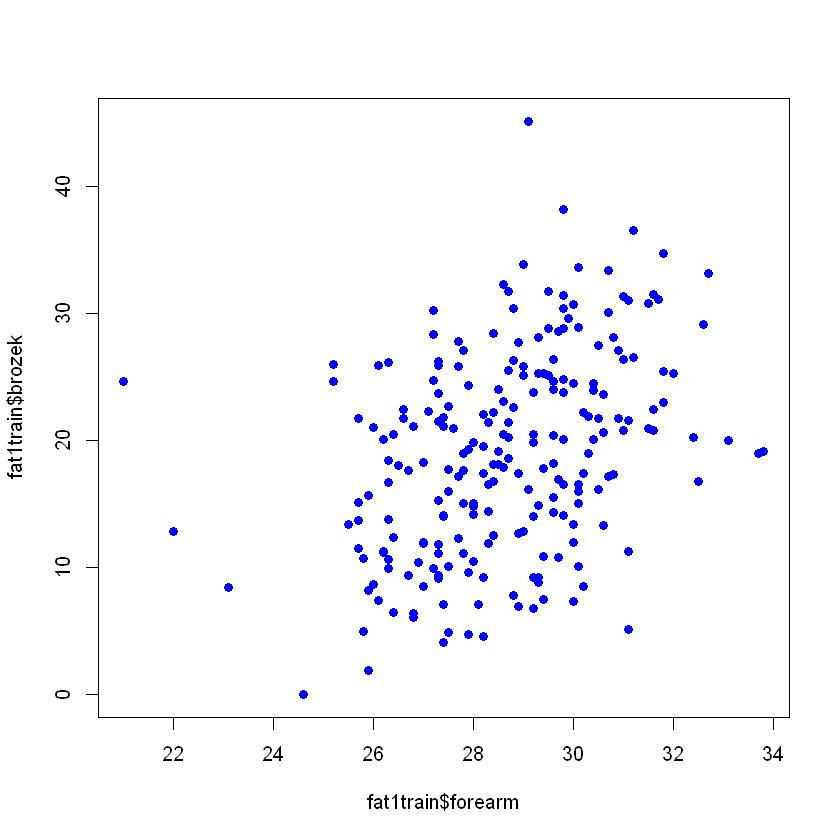

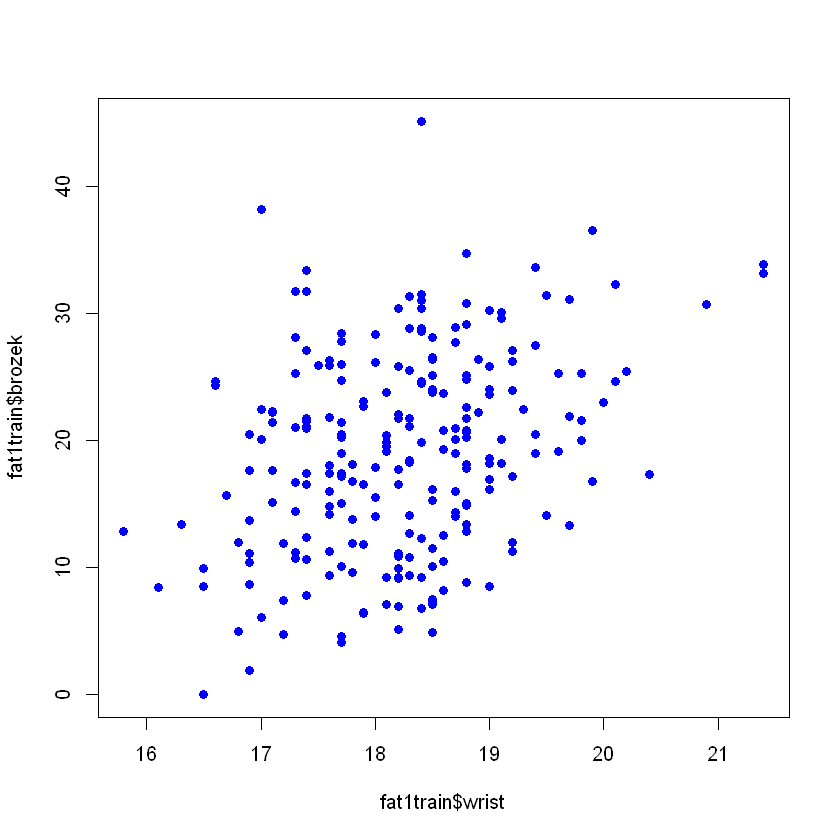

In [98]:
plot(fat1train$age, fat1train$brozek, col="blue",pch = 19) 
plot(fat1train$density, fat1train$brozek, col="blue",pch = 19)
# plot(fat1train$siri, fat1train$brozek, col="blue",pch = 19)
plot(fat1train$adipos, fat1train$brozek, col="blue",pch = 19)
plot(fat1train$neck, fat1train$brozek, col="blue",pch = 19)
plot(fat1train$chest, fat1train$brozek, col="blue",pch = 19)
plot(fat1train$abdom, fat1train$brozek, col="blue",pch = 19)
plot(fat1train$hip, fat1train$brozek, col="blue",pch = 19)
plot(fat1train$thigh, fat1train$brozek, col="blue",pch = 19)
plot(fat1train$knee, fat1train$brozek, col="blue",pch = 19)
plot(fat1train$ankle, fat1train$brozek, col="blue",pch = 19)
plot(fat1train$biceps, fat1train$brozek, col="blue",pch = 19)
plot(fat1train$forearm, fat1train$brozek, col="blue",pch = 19)
plot(fat1train$wrist, fat1train$brozek, col="blue",pch = 19)

In [99]:
## Prepare to save all training and testing errors
MSEtrain <- NULL;
MSEtest  <- NULL; 

### (1) Linear regression with all predictors (Full Model)
model_full <- lm(brozek ~ ., data = fat1train); 

## Model 1: Training error
MSEmod1train <-   mean( (resid(model_full) )^2);
MSEtrain <- c(MSEtrain, MSEmod1train);
MSEtrain

# Model 1: testing error 
pred1a <- predict(model_full, fat1test[,2:18]);
MSEmod1test <-   mean((pred1a - ytrue)^2);
MSEtest <- c(MSEtest, MSEmod1test); 
MSEtest

[1] 0.02930823

[1] 0.008755981

42       96 
2.790340 2.275265

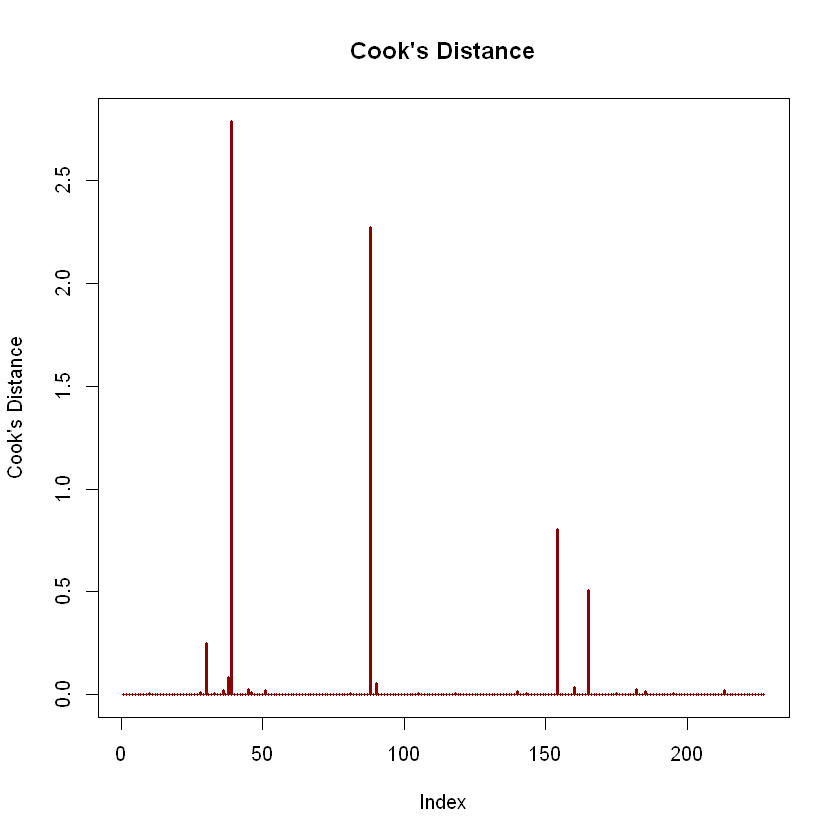

In [100]:
#checking for influencial points using cooks ditance > 1
cook = cooks.distance(model_full)
plot(cook, 
     type="h", 
     lwd=3,
     col="darkred",
     ylab="Cook's Distance",
     main="Cook's Distance")
cook[cook > 1]

In [101]:
# checking for multicollinearity
# library('car')
#VIF Threshold
VIF = max(10, 1/(1-summary(model_full)$r.squared**2))
VIF
#model VIF > Threshold
vif(model_full)[vif(model_full) > VIF]

[1] 1066.935

named numeric(0)

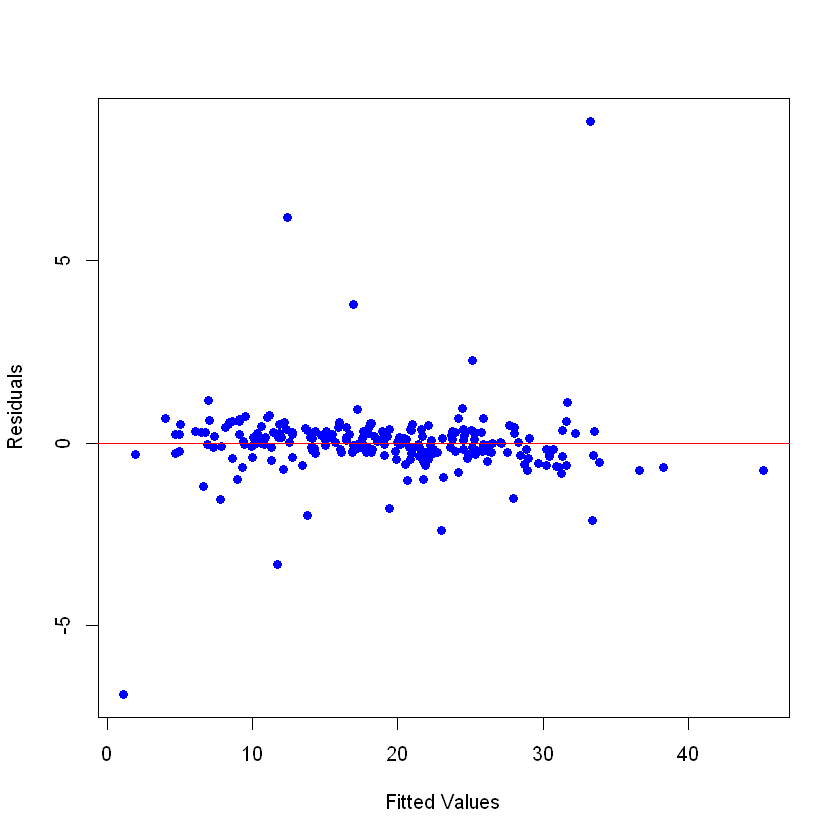

In [102]:
# check for independence
fits = model_full$fitted
plot(fits, resids, xlab="Fitted Values",ylab="Residuals", col='blue', pch=19)
abline(0,0,col="red")

169 182 
154 165

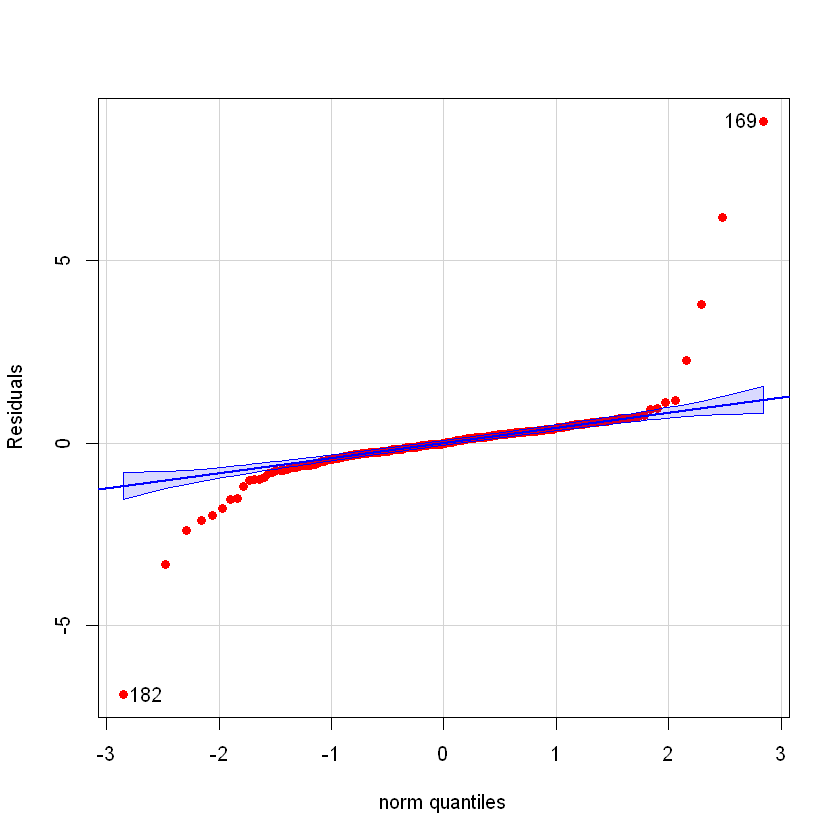

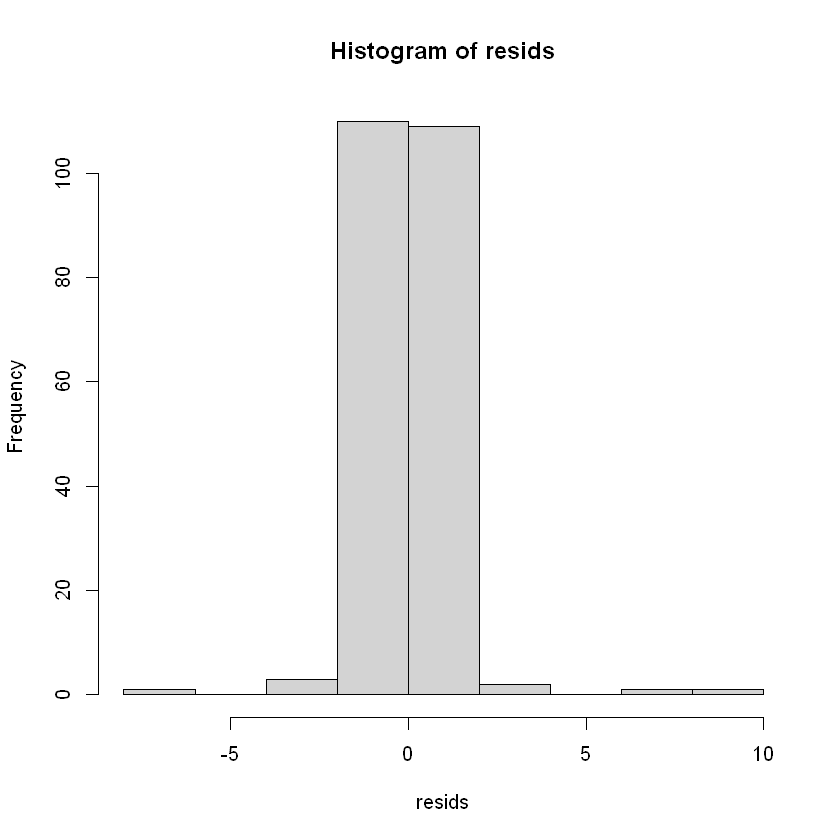

In [103]:
# Checking for normality
resids = stdres(model_full)
qqPlot(resids, ylab="Residuals", main = "", col='red', pch=19)
hist(resids)

In [104]:
### (2) Linear regression with the best subset model 
library(leaps);
model_leaps <- regsubsets(brozek ~ ., data= fat1train, nbest= 100, really.big= TRUE); 

## Record useful information from the output
leaps_models <- summary(model_leaps)$which;
leaps_models_size <- as.numeric(attr(leaps_models, "dimnames")[[1]]);
leaps_models_rss <- summary(model_leaps)$rss;

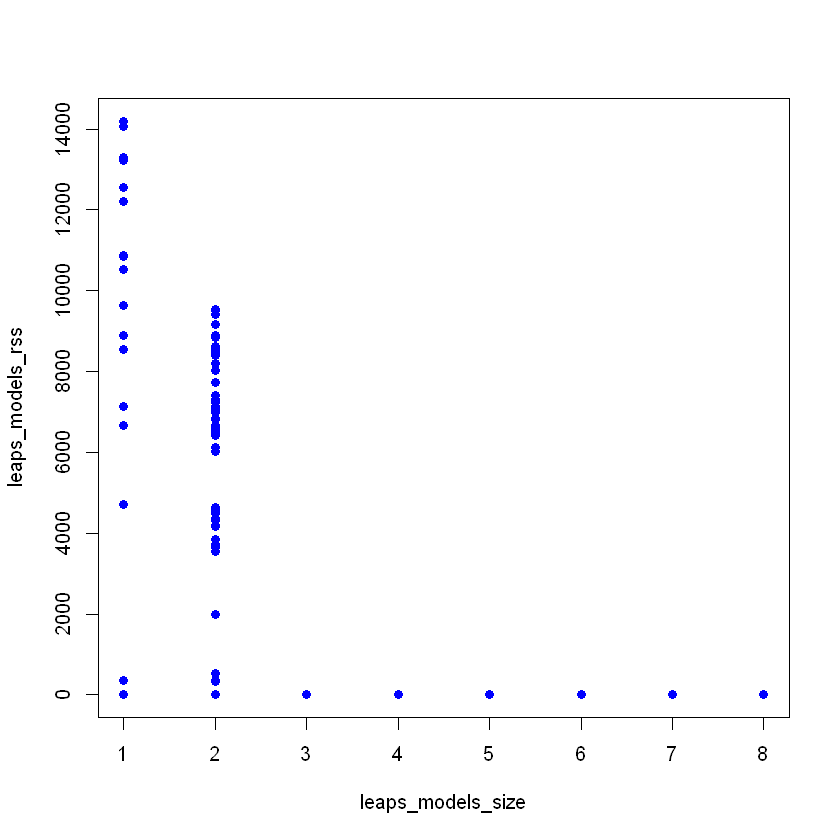

In [105]:
## 2A:  The following are to show the plots of all subset models 
##   and the best subset model for each subset size k 
plot(leaps_models_size, leaps_models_rss, col='blue', pch=19); 


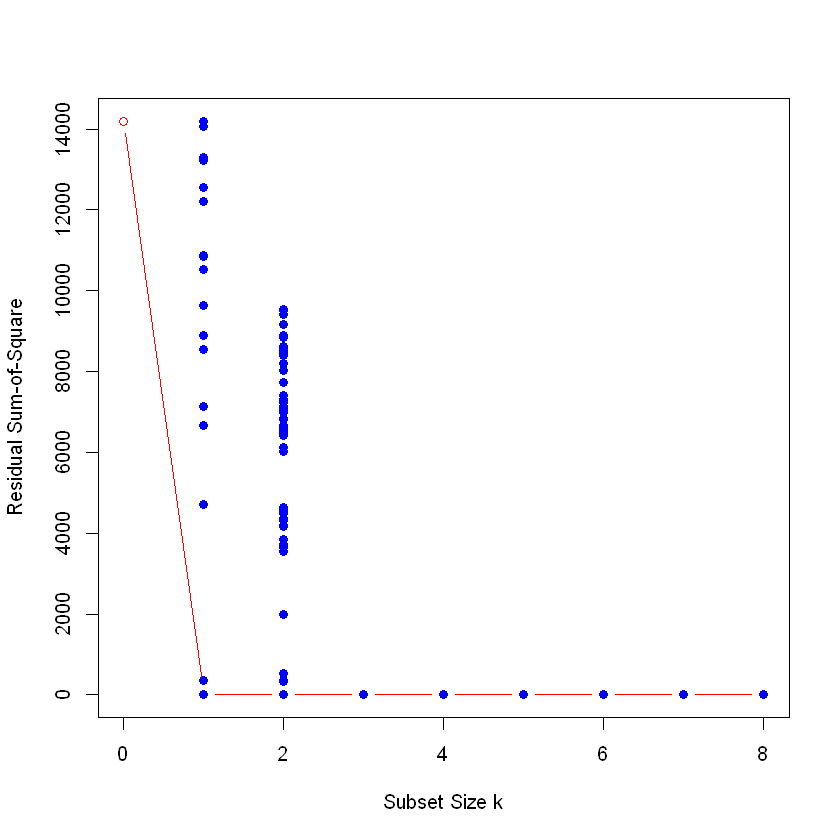

In [106]:
## find the smallest RSS values for each subset size 
leaps_models_best_rss <- tapply(leaps_models_rss, leaps_models_size, min); 

##add the results for the only intercept model
leaps_model0 <- lm(brozek ~ 1, data = fat1train); 
leaps_models_best_rss <- c( sum(resid(leaps_model0)^2), leaps_models_best_rss); 

## plot all RSS for all subset models and highlight the smallest values 
plot( 0:8, leaps_models_best_rss, type = "b", col= "red", xlab="Subset Size k", ylab="Residual Sum-of-Square")
points(leaps_models_size, leaps_models_rss, col='blue', pch=19)

In [107]:
leaps_models_best_rss

1            2            3            4            5 
14193.240088     7.652961     7.463614     7.361020     7.233890     7.143239 
           6            7            8 
    6.990509     6.914288     6.828231

In [108]:
## Find the best subset with k=5
op2 <- which(leaps_models_size == 5); 
flag2 <- op2[which.min(leaps_models_rss[op2])]; 

mod2selectedmodel <- leaps_models[flag2,]; 
mod2Xname <- paste(names(mod2selectedmodel)[mod2selectedmodel][-1], collapse="+"); 
mod2form <- paste ("brozek ~", mod2Xname);

## To auto-fit the best subset model with k=5 to the data
model_subset <- lm( as.formula(mod2form), data= fat1train); 

# Model 2: training error 
MSEmod2train <- mean(resid(model_subset)^2);
## save this training error to the overall training error vector 
MSEtrain <- c(MSEtrain, MSEmod2train);
MSEtrain;
## Model 2:  testing error 
pred2 <- predict(model_subset, fat1test[,2:18]);
MSEmod2test <-   mean((pred2 - ytrue)^2);
MSEtest <- c(MSEtest, MSEmod2test);
MSEtest;


[1] 0.02930823 0.03146801

[1] 0.008755981 0.002786218

In [109]:
model_subset


Call:
lm(formula = as.formula(mod2form), data = fat1train)

Coefficients:
(Intercept)         siri      density        thigh         knee        wrist  
  11.203419     0.904414    -9.242731     0.009904    -0.024479     0.028891  


In [110]:
### (3) Linear regression with the stepwise variable selection that minimizes the AIC criterion 
model_step  <- step(model_full); 

##coefficents of model_step
round(coef(model_step),3)
summary(model_step)

Start:  AIC=-765.28
brozek ~ siri + density + age + weight + height + adipos + free + 
    neck + chest + abdom + hip + thigh + knee + ankle + biceps + 
    forearm + wrist

          Df Sum of Sq     RSS     AIC
- neck     1     0.000   6.653 -767.28
- abdom    1     0.001   6.654 -767.26
- height   1     0.001   6.654 -767.25
- ankle    1     0.004   6.657 -767.16
- age      1     0.007   6.660 -767.06
- chest    1     0.009   6.662 -766.98
- hip      1     0.010   6.663 -766.95
<none>                   6.653 -765.28
- wrist    1     0.060   6.713 -765.26
- adipos   1     0.060   6.713 -765.24
- biceps   1     0.154   6.807 -762.09
- forearm  1     0.161   6.814 -761.84
- thigh    1     0.162   6.815 -761.81
- knee     1     0.194   6.847 -760.76
- density  1     0.205   6.858 -760.39
- free     1     0.205   6.858 -760.39
- weight   1     0.214   6.867 -760.09
- siri     1   166.915 173.568  -26.92

Step:  AIC=-767.28
brozek ~ siri + density + age + weight + height + adipos + free +

(Intercept)        siri     density      weight      adipos        free 
     12.573       0.884     -10.211       0.011      -0.016      -0.012 
      thigh        knee      biceps     forearm       wrist 
      0.013      -0.027      -0.017       0.026       0.030


Call:
lm(formula = brozek ~ siri + density + weight + adipos + free + 
    thigh + knee + biceps + forearm + wrist, data = fat1train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.12873 -0.04496 -0.00286  0.05366  1.46273 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  12.572781   4.222127   2.978  0.00323 ** 
siri          0.884216   0.011610  76.157  < 2e-16 ***
density     -10.211124   3.820851  -2.672  0.00810 ** 
weight        0.011021   0.004086   2.697  0.00755 ** 
adipos       -0.016046   0.009373  -1.712  0.08833 .  
free         -0.012479   0.004971  -2.510  0.01280 *  
thigh         0.013146   0.005091   2.582  0.01048 *  
knee         -0.027377   0.009921  -2.760  0.00629 ** 
biceps       -0.017234   0.007604  -2.266  0.02442 *  
forearm       0.025573   0.009837   2.600  0.00998 ** 
wrist         0.029532   0.020327   1.453  0.14771    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard 

In [111]:
## Model 3: training  and  testing errors 
MSEmod3train <- mean(resid(model_step)^2);
pred3 <- predict(model_step, fat1test[,2:18]);
MSEmod3test <-   mean((pred3 - ytrue)^2);
MSEtrain <- c(MSEtrain, MSEmod3train);
MSEtrain; 

## [1] 0.4391998 0.5210112 0.4393627
MSEtest <- c(MSEtest, MSEmod3test);
## Check your answer 
MSEtest;
## [1] 0.5212740 0.4005308 0.5165135

[1] 0.02930823 0.03146801 0.02945827

[1] 0.008755981 0.002786218 0.008955971

In [112]:
### (4) Ridge regression (MASS: lm.ridge, mda: gen.ridge)
library(MASS);

## The following R code gives the ridge regression for all penality function lamdba
##  Note that you can change lambda value to other different range/stepwise 
model_ridge <- lm.ridge(brozek ~ ., data= fat1train, lambda= seq(0,100,0.001));

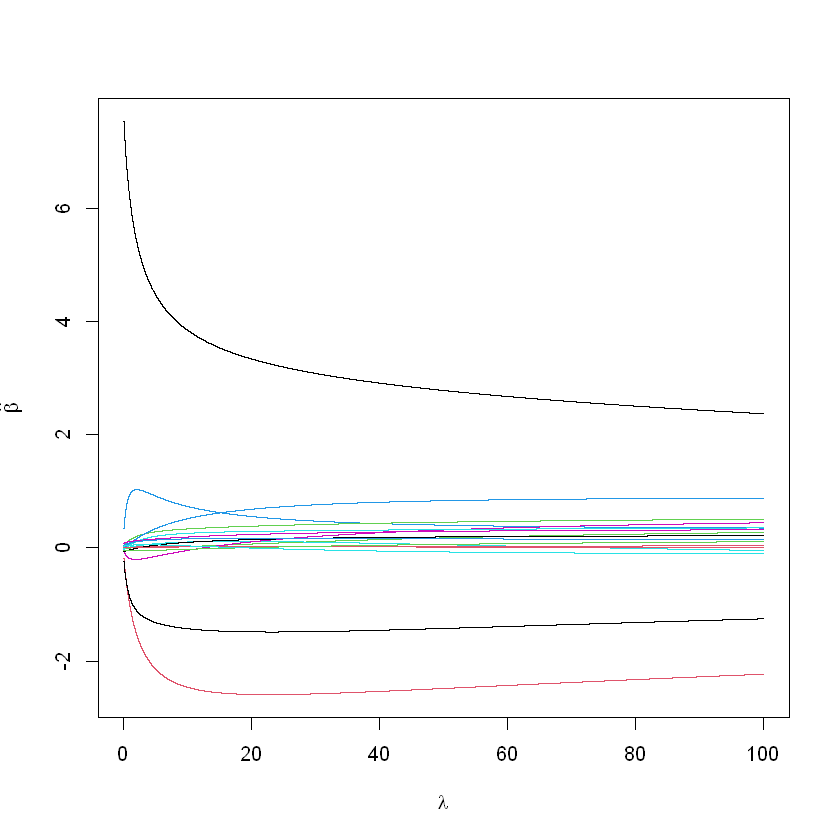

In [113]:
## 4A. Ridge Regression plot how the \beta coefficients change with \lambda values 
#plot the columns of one matrix against the columns of another
matplot(model_ridge$lambda, t(model_ridge$coef), type="l", lty=1, 
        xlab=expression(lambda), ylab=expression(hat(beta)))



In [114]:
## 4B: We need to select the ridge regression model with the optimal lambda value 

## 4B(ii) Auto-find the "index" for the optimal lambda value for Ridge regression 
##        and auto-compute the corresponding testing and testing error 
indexopt <-  which.min(model_ridge$GCV);  

## If you want, the corresponding coefficients with respect to the optimal "index"
##  it is okay not to check it!
model_ridge$coef[,indexopt]

## For the estimated \beta, we need to sparate \beta_0 (intercept) with other \beta's
ridge.coeffs = model_ridge$coef[,indexopt]/ model_ridge$scales;

intercept = -sum( ridge.coeffs  * colMeans(fat1train[,2:18] )  )+ mean(fat1train[,1]);
## If you want to see the coefficients estimated from the Ridge Regression
##   on the original data scale
c(intercept, ridge.coeffs);



siri      density          age       weight       height       adipos 
 7.532826147 -0.198150425 -0.008202470  0.344740086 -0.003043432 -0.070322406 
        free         neck        chest        abdom          hip        thigh 
-0.246665902 -0.001498501  0.022088573  0.008324242 -0.025804308  0.077865079 
        knee        ankle       biceps      forearm        wrist 
-0.063195580  0.005509778 -0.051873874  0.046580904  0.030144996

siri       density           age        weight 
 1.260951e+01  8.825518e-01 -1.020168e+01 -6.571419e-04  1.168086e-02 
       height        adipos          free          neck         chest 
-8.106033e-04 -1.912148e-02 -1.348275e-02 -6.090046e-04  2.587978e-03 
        abdom           hip         thigh          knee         ankle 
 7.600440e-04 -3.561107e-03  1.464240e-02 -2.612782e-02  3.246364e-03 
       biceps       forearm         wrist 
-1.720154e-02  2.388322e-02  3.275556e-02

In [115]:
## Model 4 (Ridge): training errors 
yhat4train <- as.matrix( fat1train[,2:18]) %*% as.vector(ridge.coeffs) + intercept;
MSEmod4train <- mean((yhat4train - fat1train$brozek)^2); 
MSEtrain <- c(MSEtrain, MSEmod4train); 
MSEtrain

## Model 4 (Ridge):  testing errors in the subset "test" 
pred4test <- as.matrix( fat1test[,2:18]) %*% as.vector(ridge.coeffs) + intercept;
MSEmod4test <-  mean((pred4test - ytrue)^2); 
MSEtest <- c(MSEtest, MSEmod4test);
MSEtest;

[1] 0.02930823 0.03146801 0.02945827 0.02930890

[1] 0.008755981 0.002786218 0.008955971 0.008859234

In [116]:
## Model (5): LASSO 

library(lars)
model_lasso <- lars( as.matrix(fat1test[,2:18]), fat1test[,1], type= "lasso", trace= TRUE);

LASSO sequence
Computing X'X .....
LARS Step 1 :	 Variable 1 	added
LARS Step 2 :	 Variable 2 	added
LARS Step 3 :	 Variable 14 	added
LARS Step 4 :	 Variable 8 	added
LARS Step 5 :	 Variable 11 	added
LARS Step 6 :	 Variable 9 	added
LARS Step 7 :	 Variable 13 	added
LARS Step 8 :	 Variable 17 	added
LARS Step 9 :	 Variable 15 	added
LARS Step 10 :	 Variable 12 	added
LARS Step 11 :	 Variable 3 	added
LARS Step 12 :	 Variable 7 	added
LARS Step 13 :	 Variable 10 	added
LARS Step 14 :	 Variable 16 	added
LARS Step 15 :	 Variable 5 	added
LARS Step 16 :	 Variable 4 	added
Lasso Step 17 :	 Variable 13 	dropped
LARS Step 18 :	 Variable 6 	added
LARS Step 19 :	 Variable 13 	added
Lasso Step 20 :	 Variable 5 	dropped
Lasso Step 21 :	 Variable 12 	dropped
Lasso Step 22 :	 Variable 15 	dropped
LARS Step 23 :	 Variable 12 	added
LARS Step 24 :	 Variable 15 	added
LARS Step 25 :	 Variable 5 	added
Lasso Step 26 :	 Variable 7 	dropped
LARS Step 27 :	 Variable 7 	added
Lasso Step 28 :	 Variable 3

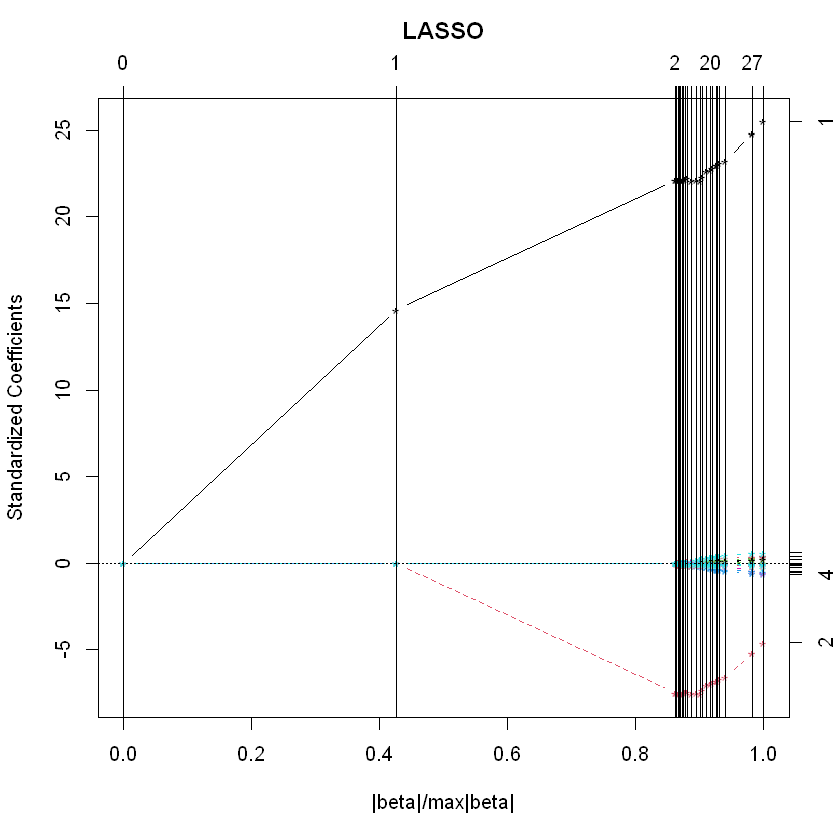

In [117]:
## 5A: some useful plots for LASSO for all penalty parameters \lambda 
plot(model_lasso)

In [118]:
## 5B: choose the optimal \lambda value that minimizes Mellon's Cp criterion 
Cp1  <- summary(model_lasso)$Cp;
index1 <- which.min(Cp1);

## the beta coefficient values (except the intercepts)
coef_lasso <- coef(model_lasso)[index1,]
coef_lasso





siri       density           age        weight        height 
 6.875082e-01 -1.041022e+02  0.000000e+00  0.000000e+00  0.000000e+00 
       adipos          free          neck         chest         abdom 
 0.000000e+00  0.000000e+00  4.327211e-03  0.000000e+00  0.000000e+00 
          hip         thigh          knee         ankle        biceps 
 0.000000e+00  0.000000e+00  0.000000e+00 -8.842527e-03  0.000000e+00 
      forearm         wrist 
 0.000000e+00  0.000000e+00

In [119]:
## Can you get the intercept value? 
##  \beta0 = mean(Y) - mean(X)*\beta of training data for all linear models including LASSO
LASSOintercept = mean(fat1train[,1]) -sum( coef_lasso  * colMeans(fat1train[,2:18] ));
c(LASSOintercept, coef_lasso)

siri       density           age        weight 
 1.157023e+02  6.875082e-01 -1.041022e+02  0.000000e+00  0.000000e+00 
       height        adipos          free          neck         chest 
 0.000000e+00  0.000000e+00  0.000000e+00  4.327211e-03  0.000000e+00 
        abdom           hip         thigh          knee         ankle 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -8.842527e-03 
       biceps       forearm         wrist 
 0.000000e+00  0.000000e+00  0.000000e+00

In [120]:
model_lasso$lambda[index1]

[1] 0.01158644

In [121]:
lasso_lambda <- model_lasso$lambda[index1]
lasso_lambda 

[1] 0.01158644

In [122]:
## Model 5:  training error for lasso
## 
lasso_lambda <- model_lasso$lambda[index1]
pred5train  <- predict(model_lasso, as.matrix(fat1train[,2:18]), s=lasso_lambda, type="fit", mode="lambda");
yhat5train <- pred5train$fit; 
MSEmod5train <- mean((yhat5train - fat1train$brozek)^2); 
MSEtrain <- c(MSEtrain, MSEmod5train); 
MSEtrain



[1] 0.02930823 0.03146801 0.02945827 0.02930890 0.12214236

In [123]:
## Model 5:  testing error for lasso  
lasso_lambda <- model_lasso$lambda[index1]
pred5test <- predict(model_lasso, as.matrix(fat1test[,2:18]), s=lasso_lambda, type="fit", mode="lambda");
yhat5test <- pred5test$fit; 
MSEmod5test <- mean( (yhat5test - fat1test$brozek)^2); 
MSEtest <- c(MSEtest, MSEmod5test); 
MSEtest;


[1] 0.0087559812 0.0027862181 0.0089559712 0.0088592337 0.0005962849

In [124]:
#### Model 6: Principal Component Regression (PCR) 
library(pls)
## call the pcr function to run the linear regression on all possible # of PCs.
model_pca <- pcr(brozek ~., data=fat1train, validation="CV");  
summary(model_pca); 

Data: 	X dimension: 227 17 
	Y dimension: 227 1
Fit method: svdpc
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           7.942    6.614    3.551    1.472    1.161    1.074   0.9863
adjCV        7.942    6.610    3.544    1.467    1.120    1.070   0.9790
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV      0.9827   0.9630   0.9612    0.8632    0.8063    0.7765    0.5199
adjCV   0.9743   0.9593   0.9634    0.8474    0.7811    0.7489    0.4842
       14 comps  15 comps  16 comps  17 comps
CV       0.2788    0.2066    0.2182    0.2282
adjCV    0.2785    0.2047    0.2152    0.2245

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         77.22    91.19    97.12    97.89    98.56    98.95    99.20    99.40
brozek    31.49    80.71    96.91    98.37    98.39    98.81    98.83  

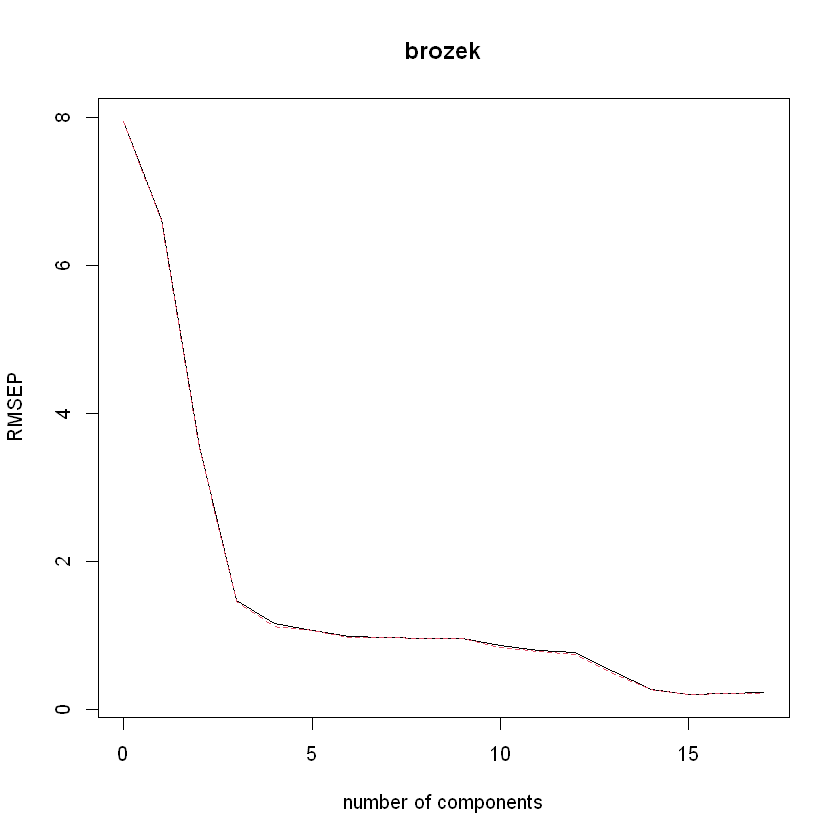

In [125]:
##plots to see the effects on the number of PCs 
validationplot(model_pca);

In [126]:
### Auto-select # of components automatically optimazation by PCR based on the cross-validation
ncompopt <- which.min(model_pca$validation$adj);
ncompopt


[1] 17

In [127]:
## 6B(iv) Training Error with the optimal choice of PCs
ypred6train <- predict(model_pca, ncomp = ncompopt, newdata = fat1train[,2:18]); 
MSEmod6train <- mean( (ypred6train - fat1train$brozek)^2); 
MSEtrain <- c(MSEtrain, MSEmod6train); 
MSEtrain;

## 6B(v) Testing Error with the optimal choice of PCs
ypred6test <- predict(model_pca, ncomp = ncompopt, newdata = fat1test[,2:18]); 
MSEmod6test <- mean( (ypred6test - fat1test$brozek)^2); 
MSEtest <- c(MSEtest, MSEmod6test); 
MSEtest;

[1] 0.02930823 0.03146801 0.02945827 0.02930890 0.12214236 0.02930823

[1] 0.0087559812 0.0027862181 0.0089559712 0.0088592337 0.0005962849
[6] 0.0087559812

In [128]:
### Model 7. Partial Least Squares (PLS) Regression 
model_pls <- plsr(brozek ~ ., data = fat1train, validation="CV");
## choose the optimal # of components  
mod7ncompopt <- which.min(model_pls$validation$adj);
mod7ncompopt

[1] 12

In [129]:
# 7(ii) Training Error with the optimal choice of "mod7ncompopt" 
ypred7train <- predict(model_pls, ncomp = mod7ncompopt, newdata = fat1train); 
MSEmod7train <- mean( (ypred7train - fat1train$brozek)^2); 
MSEtrain <- c(MSEtrain, MSEmod7train); 
MSEtrain;

[1] 0.02930823 0.03146801 0.02945827 0.02930890 0.12214236 0.02930823 0.03022288

In [130]:
## 7(iii) Testing Error with the optimal choice of "mod7ncompopt" 
ypred7test <- predict(model_pls, ncomp = mod7ncompopt, newdata = fat1test); 
MSEmod7test <- mean( (ypred7test - fat1test$brozek)^2); 
MSEtest <- c(MSEtest, MSEmod7test); 
MSEtest;

[1] 0.0087559812 0.0027862181 0.0089559712 0.0088592337 0.0005962849
[6] 0.0087559812 0.0083708976

In [131]:
## Training errors of these 7 models/methods
MSEtrain 

## Testing errors of these 7 models/methods
MSEtest

[1] 0.02930823 0.03146801 0.02945827 0.02930890 0.12214236 0.02930823 0.03022288

[1] 0.0087559812 0.0027862181 0.0089559712 0.0088592337 0.0005962849
[6] 0.0087559812 0.0083708976

In [132]:
### Part (e): the following R code might be useful, and feel free to modify it.
B= 100; ### number of loops
TEALL = NULL; ### Final TE values
set.seed(7405); ### You might want to set the seed for randomization
for (b in 1:B){
### randomly select 25 observations as testing data in each loop
flag <- sort(sample(1:n, n1));
fattrain <- fat[-flag,];
fattest <- fat[flag,];
ytrue <- fattest$brozek


### (1) Linear regression with all predictors (Full Model)
###     This fits a full linear regression model on the training data
model_full_cv <- lm(brozek ~ ., data = fattrain); 

pred1a <- predict(model_full_cv, fattest[,2:18]);
te1 <-   mean((pred1a - ytrue)^2);
     

### (2) Linear regression with the best subset model 
model_leaps_cv <- regsubsets(brozek ~ ., data= fattrain, nbest= 100, really.big= TRUE);     

## Record useful information from the output
leaps_models <- summary(model_leaps_cv)$which;
leaps_models_size <- as.numeric(attr(leaps_models, "dimnames")[[1]]);
leaps_models_rss <- summary(model_leaps_cv)$rss;    
    
op2 <- which(leaps_models_size == 5); 
flag2 <- op2[which.min(leaps_models_rss[op2])]; 

mod2selectedmodel <- leaps_models[flag2,]; 
mod2Xname <- paste(names(mod2selectedmodel)[mod2selectedmodel][-1], collapse="+"); 
mod2form <- paste("brozek ~", mod2Xname);

model_subset <- lm( as.formula(mod2form), data= fattrain); 

pred2 <- predict(model_subset, fattest[,2:18]);
te2 <-   mean((pred2 - ytrue)^2);


### (3) Linear regression with the stepwise variable selection that minimizes the AIC criterion 
model_step  <- step(model_full); 
    
pred3 <- predict(model_step, fattest[,2:18]);
te3 <-   mean((pred3 - ytrue)^2);    
    


##  model 4: Ridge Regression
model_ridge_cv <- lm.ridge(brozek ~ ., data= fattrain, lambda= seq(0,100,0.001));    

## 4B(ii) Auto-find the "index" for the optimal lambda value for Ridge regression 
##        and auto-compute the corresponding testing and testing error 
indexopt <-  which.min(model_ridge_cv$GCV);  

ridge.coeffs = model_ridge$coef[,indexopt]/ model_ridge_cv$scales;
intercept = -sum( ridge.coeffs  * colMeans(fattrain[,2:18] )  )+ mean(fattrain[,1]);
    
## Model 4 (Ridge):  testing errors in the subset "test" 
pred4test <- as.matrix( fattest[,2:18]) %*% as.vector(ridge.coeffs) + intercept;
MSEmod4test <-  mean((pred4test - ytrue)^2); 
te4 <- c(MSEtest, MSEmod4test);

## Model (5): LASSO 

model_lasso_cv <- lars( as.matrix(fattest[,2:18]), fattest[,1], type= "lasso", trace= TRUE);
    
## 5B: choose the optimal \lambda value that minimizes Mellon's Cp criterion 
Cp2  <- summary(model_lasso_cv)$Cp;
index2 <- which.min(Cp2);

## the beta coefficient values (except the intercepts)
coef_lasso <- coef(model_lasso_cv)[index2,]

LASSOintercept = mean(fattrain[,1]) -sum( coef_lasso  * colMeans(fattrain[,2:18] )); 

## Model 5:  testing error for lasso  
lasso_lambda <- model_lasso_cv$lambda[index2]
pred5test <- predict(model_lasso_cv, as.matrix(fattest[,2:18]), s=lasso_lambda, type="fit", mode="lambda");
yhat5test <- pred5test$fit; 
te5 <- mean( (yhat5test - fattest$brozek)^2); 

#### Model 6: Principal Component Regression (PCR)     
model_pca_cv <- pcr(brozek ~., data=fattrain, validation="CV"); 
### Auto-select # of components automatically optimazation by PCR based on the cross-validation
ncompopt <- which.min(model_pca_cv$validation$adj);
## 6B(v) Testing Error with the optimal choice of PCs
ypred6test <- predict(model_pca_cv, ncomp = ncompopt, newdata = fattest[,2:18]); 
te6 <- mean( (ypred6test - fattest$brozek)^2); 


### Model 7. Partial Least Squares (PLS) Regression 
model_pls_cv <- plsr(brozek ~ ., data = fattrain, validation="CV");
## choose the optimal # of components  
mod7ncompopt <- which.min(model_pls_cv$validation$adj);
## 7(iii) Testing Error with the optimal choice of "mod7ncompopt" 
ypred7test <- predict(model_pls_cv, ncomp = mod7ncompopt, newdata = fattest); 
te7 <- mean( (ypred7test - fattest$brozek)^2); 
        
# te5 <- 0  
     
    
    
TEALL = rbind( TEALL, cbind(te1, te2, te3, te4, te5, te6, te7) );
}

head(TEALL)


Start:  AIC=-765.28
brozek ~ siri + density + age + weight + height + adipos + free + 
    neck + chest + abdom + hip + thigh + knee + ankle + biceps + 
    forearm + wrist

          Df Sum of Sq     RSS     AIC
- neck     1     0.000   6.653 -767.28
- abdom    1     0.001   6.654 -767.26
- height   1     0.001   6.654 -767.25
- ankle    1     0.004   6.657 -767.16
- age      1     0.007   6.660 -767.06
- chest    1     0.009   6.662 -766.98
- hip      1     0.010   6.663 -766.95
<none>                   6.653 -765.28
- wrist    1     0.060   6.713 -765.26
- adipos   1     0.060   6.713 -765.24
- biceps   1     0.154   6.807 -762.09
- forearm  1     0.161   6.814 -761.84
- thigh    1     0.162   6.815 -761.81
- knee     1     0.194   6.847 -760.76
- density  1     0.205   6.858 -760.39
- free     1     0.205   6.858 -760.39
- weight   1     0.214   6.867 -760.09
- siri     1   166.915 173.568  -26.92

Step:  AIC=-767.28
brozek ~ siri + density + age + weight + height + adipos + free +

te1,te2,te3,te4,te5,te6,te7
0.1556151,0.003097331,0.004489961,0.0087559812,0.00107327,0.1556151,0.1556151
0.1556151,0.003097331,0.004489961,0.0027862181,0.00107327,0.1556151,0.1556151
0.1556151,0.003097331,0.004489961,0.0089559712,0.00107327,0.1556151,0.1556151
0.1556151,0.003097331,0.004489961,0.0088592337,0.00107327,0.1556151,0.1556151
0.1556151,0.003097331,0.004489961,0.0005962849,0.00107327,0.1556151,0.1556151
0.1556151,0.003097331,0.004489961,0.0087559812,0.00107327,0.1556151,0.1556151


In [133]:
dim(TEALL); ### This should be a Bx7 matrices

[1] 800   7

In [134]:
### if you want, you can change the column name of TEALL
colnames(TEALL) <- c("mod1", "mod2", "mod3", "mod4", "mod5", "mod6", "mod7");

In [135]:
## You can report the sample mean and sample variances for the seven models
apply(TEALL, 2, mean);
apply(TEALL, 2, var);

mod1        mod2        mod3        mod4        mod5        mod6 
0.056993441 0.046605466 0.029426323 0.017541259 0.006352454 0.056436303 
       mod7 
0.056736120

mod1         mod2         mod3         mod4         mod5         mod6 
6.411120e-03 6.420143e-03 1.095917e-03 1.653355e-03 9.395851e-05 6.468902e-03 
        mod7 
6.278065e-03

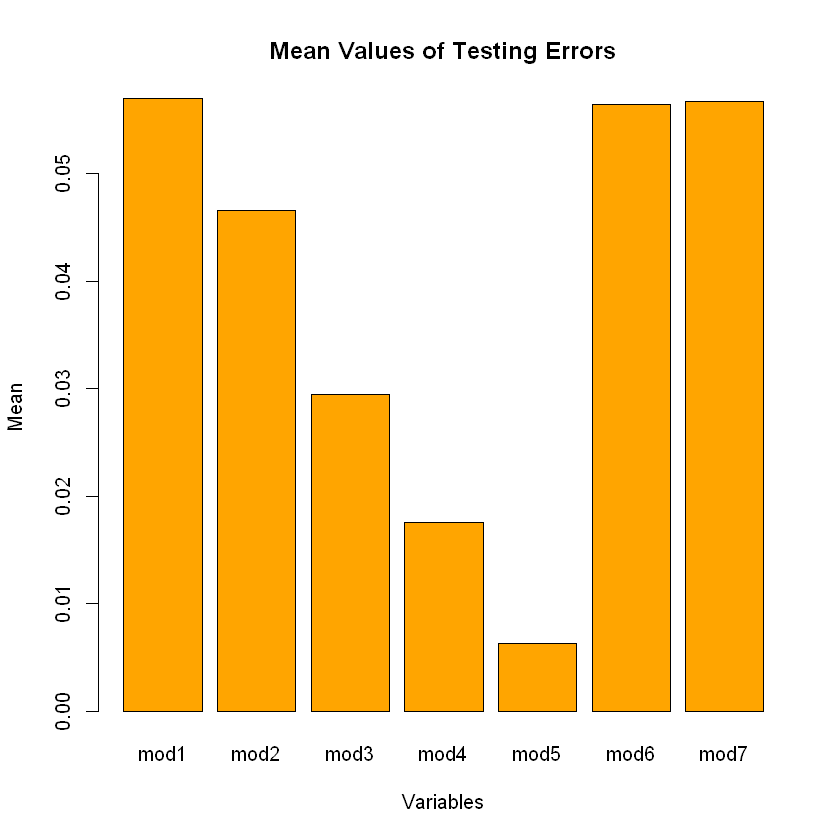

In [136]:
mean_values <- apply(TEALL, 2, mean)

# Getting variable names
variable_names <- colnames(TEALL)

# Creating a bar plot
barplot(mean_values, names.arg = variable_names,
        main = "Mean Values of Testing Errors",
        xlab = "Variables",
        ylab = "Mean",
        col = "orange")

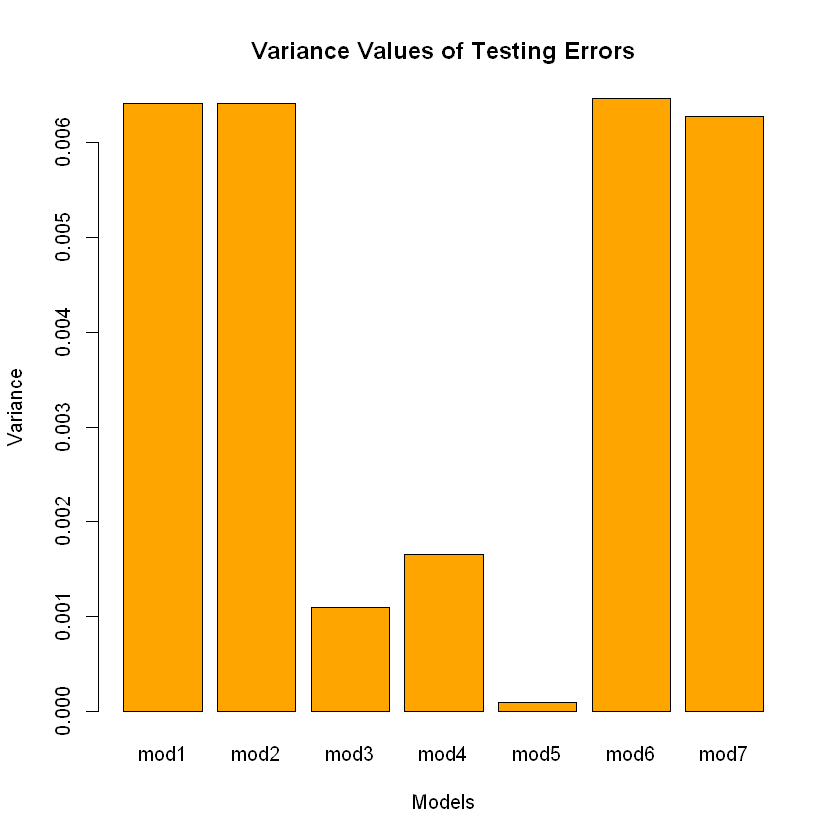

In [137]:
variance_values <- apply(TEALL, 2, var)

# Creating a bar plot
barplot(variance_values, names.arg = variable_names,
        main = "Variance Values of Testing Errors",
        xlab = "Models",
        ylab = "Variance",
        col = "orange")